1. Write a CUDA C/C++ program to perform element-wise addition of two
vectors.

C[i]=A[i]+B[i]

Given: Vector size: N = 1024

In [37]:
%%writefile addvector.cu
#include<stdio.h>
#include <cuda_runtime.h>
#define N 1024

__global__ void add(int *a, int *b, int *c){
  int index= blockIdx.x * blockDim.x + threadIdx.x;
  c[index] = a[index] + b[index];
};

int main(void) {
  int *a, *b, *c;
  int *d_a, *d_b, *d_c;
  int size = N * sizeof(int);

  a = (int *)malloc(size);
  b = (int *)malloc(size);
  c = (int *)malloc(size);

  printf("Array values of A: ");
  for (int i = 0; i < N; i++) {
    a[i] = i;
    printf("%d ",a[i]);
  }

  printf("\n");

  printf("Array values of B: ");
  for (int i = 0; i < N; i++) {
    b[i] = i + N;
    printf("%d ",b[i]);
  }

  printf("\n\n");

  cudaMalloc((void **)&d_a, size);
  cudaMalloc((void **)&d_b, size);
  cudaMalloc((void **)&d_c, size);

  cudaMemcpy(d_a, a, size, cudaMemcpyHostToDevice);
  cudaMemcpy(d_b, b, size, cudaMemcpyHostToDevice);

  int threads = 8;
  int blocks = (N + threads - 1) / threads;

  add<<<blocks,threads>>>(d_a, d_b, d_c);

  // Copy result back to host
  cudaMemcpy(c, d_c, size, cudaMemcpyDeviceToHost);
  printf("Array values of C (A + B): ");
  for(int i=0; i<N; i++)
    printf("%d ", c[i]);

  // Cleanup
  cudaFree(d_a); cudaFree(d_b); cudaFree(d_c);
  return 0;
  }

Overwriting addvector.cu


In [38]:
!nvcc -arch=sm_75 addvector.cu -o addvector
! ./addvector

Array values of A: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272

2. Perform the same vector addi;on as in Q1 using Thrust library only.

In [39]:
%%writefile thrust_add.cu

#include<stdio.h>
#include <thrust/device_vector.h>
#include <thrust/host_vector.h>
#include <thrust/transform.h>

#define N 1024

int main(void) {
  thrust::host_vector<int> h_a(N);
  thrust::host_vector<int> h_b(N);

  printf("Array values of A: ");
  for (int i = 0; i < N; i++) {
    h_a[i] = i;
    printf("%d ",h_a[i]);
  }

  printf("\n");

  printf("Array values of B: ");
  for (int i = 0; i < N; i++) {
    h_b[i] = i + N;
    printf("%d ",h_b[i]);
  }

  printf("\n\n");

  thrust::device_vector<int> d_a = h_a;
  thrust::device_vector<int> d_b = h_b;
  thrust::device_vector<int> d_c(N);

  thrust::transform(d_a.begin(), d_a.end(), d_b.begin(), d_c.begin(), thrust::plus<int>());

  thrust::host_vector<int> h_c = d_c;

  printf("Array values of C (A + B): ");
  for(int i=0; i < N; i++)
    printf("%d ", h_c[i]);

  return 0;
}


Overwriting thrust_add.cu


In [40]:
!nvcc -arch=sm_75 thrust_add.cu -o thrust_add
! ./thrust_add

Array values of A: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272

3. Compute the dot product of two vectors of size, N =1024: Result=∑A[i]×B[i]
using Thrust and compare its performance with that on CPU.

In [41]:
%%writefile dot_product_gpu.cu

#include<stdio.h>
#include <thrust/device_vector.h>
#include <thrust/host_vector.h>
#include <thrust/inner_product.h>

#define N 1024

int main(void) {
  thrust::host_vector<int> h_a(N);
  thrust::host_vector<int> h_b(N);

  printf("Array values of A: ");
  for (int i = 0; i < N; i++) {
    h_a[i] = i;
    printf("%d ",h_a[i]);
  }

  printf("\n");

  printf("Array values of B: ");
  for (int i = 0; i < N; i++) {
    h_b[i] = i * 2;
    printf("%d ",h_b[i]);
  }

  printf("\n\n");

  thrust::device_vector<int> d_a = h_a;
  thrust::device_vector<int> d_b = h_b;

  int dot_product = thrust::inner_product(d_a.begin(), d_a.end(), d_b.begin(), 0);

  printf("Dot product of A & B: %d\n", dot_product);

  return 0;
}


Overwriting dot_product_gpu.cu


In [42]:
!nvcc -arch=sm_75 dot_product_gpu.cu -o dot_product_gpu
! ./dot_product_gpu

Array values of A: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272

In [43]:
%%writefile dot_product_cpu.c

#include<stdio.h>

#define N 1024

int main(void) {
  int a[N], b[N];
  int dot_product = 0;

  printf("Array values of A: ");
  for (int i = 0; i < N; i++) {
    a[i] = i;
    printf("%d ",a[i]);
  }

  printf("\n");

  printf("Array values of B: ");
  for (int i = 0; i < N; i++) {
    b[i] = i * 2;
    printf("%d ",b[i]);
  }

  printf("\n\n");

  for (int i = 0; i < N; i++) {
    dot_product = dot_product + (a[i] * b[i]);
  }



  printf("Dot product of A & B: %d\n", dot_product);

  return 0;
}


Overwriting dot_product_cpu.c


In [44]:
!g++ dot_product_cpu.c -o dot_product_cpu
!./dot_product_cpu


Array values of A: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272

In [45]:
#GPU vs CPU execution time comparison (N = 1024)
import subprocess
import time

def measure_time(command):
    start = time.perf_counter()
    subprocess.run(command, shell=True, check=True)
    end = time.perf_counter()
    return end - start


cpu_time = measure_time("./dot_product_cpu")
gpu_time = measure_time("./dot_product_gpu")

print(f"CPU Execution Time : {cpu_time:.6f} seconds")
print(f"GPU Execution Time : {gpu_time:.6f} seconds")

CPU Execution Time : 0.003094 seconds
GPU Execution Time : 0.411666 seconds


4. Write a CUDA kernel for matrix mul;plica;on: C=A×B where Matrix size is 16
X 16. Explain why matrix mul;plica;on needs more computa;on than
addi;on (as in Q1).

In [46]:
%%writefile matmul_gpu.cu
#include <stdio.h>
#include <cuda_runtime.h>

#define N 16

__global__ void matrixMulKernel(float *A, float *B, float *C)
{
    int row = threadIdx.y;
    int col = threadIdx.x;

    float sum = 0.0f;

    for (int k = 0; k < N; k++)
    {
        sum += A[row * N + k] * B[k * N + col];
    }

    C[row * N + col] = sum;
}

int main()
{
    float h_A[N*N], h_B[N*N], h_C[N*N];

    // Initialize matrices
    for (int i = 0; i < N*N; i++) {
        h_A[i] = 1.0f;   // Example values
        h_B[i] = 1.0f;
    }

    float *d_A, *d_B, *d_C;

    cudaMalloc(&d_A, N*N*sizeof(float));
    cudaMalloc(&d_B, N*N*sizeof(float));
    cudaMalloc(&d_C, N*N*sizeof(float));

    cudaMemcpy(d_A, h_A, N*N*sizeof(float), cudaMemcpyHostToDevice);
    cudaMemcpy(d_B, h_B, N*N*sizeof(float), cudaMemcpyHostToDevice);

    dim3 threadsPerBlock(N, N);
    dim3 blocksPerGrid(1, 1);

    matrixMulKernel<<<blocksPerGrid, threadsPerBlock>>>(d_A, d_B, d_C);

    cudaMemcpy(h_C, d_C, N*N*sizeof(float), cudaMemcpyDeviceToHost);

    printf("Result Matrix C:\n");

    for (int row = 0; row < N; row++) {
        for (int col = 0; col < N; col++) {
            printf("%f ", h_C[row * N + col]);
        }
        printf("\n");
    }

    cudaFree(d_A);
    cudaFree(d_B);
    cudaFree(d_C);

    return 0;
}


Overwriting matmul_gpu.cu


In [47]:
!nvcc -arch=sm_75 matmul_gpu.cu -o matmul_gpu
! ./matmul_gpu

Result Matrix C:
16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 
16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 
16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 
16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 
16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 
16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 16.000000 
16.000000 16.0000

5. For vector addition of size 5,000,000, implement and compare:

• CPU sequential C/C++ program

• CUDA kernel implementation

• Thrust implementation

• RAPIDS implementation

Measure execu;on time and compare complexity for each approach and
present results in a table. Plot comparison graph.

In [48]:
%%writefile vector_add_cpu.cpp
#include <iostream>
#include <vector>

#define N 5000000

int main() {
    std::vector<float> A(N, 1.0f);
    std::vector<float> B(N, 2.0f);
    std::vector<float> C(N);

    for (int i = 0; i < N; i++)
        C[i] = A[i] + B[i];

    std::cout << "CPU computation finished\n";
    return 0;
}


Overwriting vector_add_cpu.cpp


In [49]:
%%writefile vector_add_cuda.cu
#include <iostream>
#include <cuda_runtime.h>

#define N 5000000

__global__ void vectorAdd(float *A, float *B, float *C) {
    int i = blockIdx.x * blockDim.x + threadIdx.x;
    if (i < N)
        C[i] = A[i] + B[i];
}

int main() {
    float *h_A, *h_B;
    float *d_A, *d_B, *d_C;

    size_t size = N * sizeof(float);

    h_A = (float*)malloc(size);
    h_B = (float*)malloc(size);

    for (int i = 0; i < N; i++) {
        h_A[i] = 1.0f;
        h_B[i] = 2.0f;
    }

    cudaMalloc(&d_A, size);
    cudaMalloc(&d_B, size);
    cudaMalloc(&d_C, size);

    cudaMemcpy(d_A, h_A, size, cudaMemcpyHostToDevice);
    cudaMemcpy(d_B, h_B, size, cudaMemcpyHostToDevice);

    int threads = 256;
    int blocks = (N + threads - 1) / threads;

    vectorAdd<<<blocks, threads>>>(d_A, d_B, d_C);

    cudaDeviceSynchronize();

    std::cout << "CUDA computation finished\n";

    cudaFree(d_A);
    cudaFree(d_B);
    cudaFree(d_C);
    free(h_A);
    free(h_B);

    return 0;
}


Overwriting vector_add_cuda.cu


In [50]:
%%writefile vector_add_thrust.cu
#include <iostream>
#include <thrust/device_vector.h>
#include <thrust/transform.h>
#include <thrust/functional.h>

#define N 5000000

int main() {
    thrust::device_vector<float> A(N, 1.0f);
    thrust::device_vector<float> B(N, 2.0f);
    thrust::device_vector<float> C(N);

    thrust::transform(A.begin(), A.end(), B.begin(), C.begin(), thrust::plus<float>());

    cudaDeviceSynchronize();

    std::cout << "Thrust computation finished\n";
    return 0;
}


Overwriting vector_add_thrust.cu


In [51]:
import cupy as cp

N = 5_000_000

A = cp.ones(N, dtype=cp.float32)
B = cp.ones(N, dtype=cp.float32) * 2

C = A + B

cp.cuda.Stream.null.synchronize()

print("RAPIDS/CuPy computation finished")


RAPIDS/CuPy computation finished


In [52]:
%%bash
g++ vector_add_cpu.cpp -o vector_add_cpu
nvcc vector_add_cuda.cu -o vector_add_cuda
nvcc vector_add_thrust.cu -o vector_add_thrust


nvcc warning : Support for offline compilation for architectures prior to '<compute/sm/lto>_75' will be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
nvcc warning : Support for offline compilation for architectures prior to '<compute/sm/lto>_75' will be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [53]:
import subprocess
import time
import cupy as cp


def measure_time(command):
    start = time.perf_counter()
    subprocess.run(command, shell=True, check=True)
    end = time.perf_counter()
    return end - start

start = time.perf_counter()
N = 5_000_000
A = cp.ones(N, dtype=cp.float32)
B = cp.ones(N, dtype=cp.float32) * 2
C = A + B
cp.cuda.Stream.null.synchronize()

end = time.perf_counter()

rapids_time = end - start
cpu_time = measure_time("./vector_add_cpu")
cuda_time = measure_time("./vector_add_cuda")
thrust_time = measure_time("./vector_add_thrust")


print(f"CPU Execution Time    : {cpu_time:.6f} seconds")
print(f"CUDA Execution Time   : {cuda_time:.6f} seconds")
print(f"Thrust Execution Time : {thrust_time:.6f} seconds")
print(f"RAPIDS Execution Time : {rapids_time:.6f} seconds")


CPU Execution Time    : 0.108067 seconds
CUDA Execution Time   : 0.448700 seconds
Thrust Execution Time : 0.394183 seconds
RAPIDS Execution Time : 0.001148 seconds


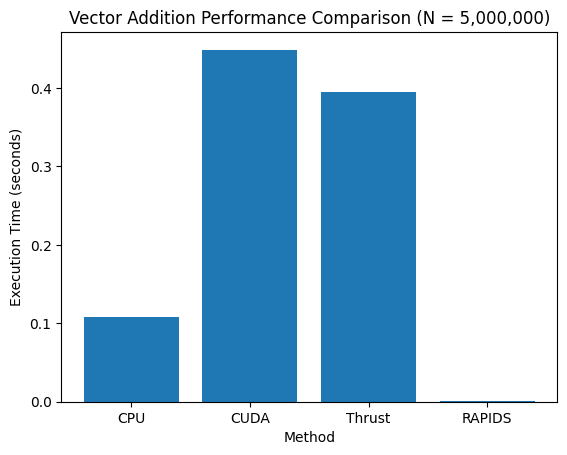

In [54]:
import matplotlib.pyplot as plt

methods = ["CPU", "CUDA", "Thrust", "RAPIDS"]
times = [cpu_time, cuda_time, thrust_time, rapids_time]

plt.figure()
plt.bar(methods, times)
plt.xlabel("Method")
plt.ylabel("Execution Time (seconds)")
plt.title("Vector Addition Performance Comparison (N = 5,000,000)")
plt.show()


6. Write a CUDA C++ program using the Thrust library to compute the sum of
all elements in a vector stored on the GPU. The vector is of size 10 and it
should be initialized with values 1,…..10.

In [55]:
%%writefile thrust_sum.cu
#include <iostream>
#include <thrust/device_vector.h>
#include <thrust/reduce.h>

int main() {
    const int N = 10;

    // Create vector on GPU
    thrust::device_vector<int> d_vec(N);

    // Initialize values 1..10
    for (int i = 0; i < N; i++)
        d_vec[i] = i + 1;

    // Compute sum on GPU
    int sum = thrust::reduce(d_vec.begin(), d_vec.end(), 0, thrust::plus<int>());

    std::cout << "Sum of vector elements: " << sum << std::endl;

    return 0;
}


Overwriting thrust_sum.cu


In [56]:
!nvcc -arch=sm_75 thrust_sum.cu -o thrust_sum
! ./thrust_sum

Sum of vector elements: 55


7. Write a CUDA C++ program using Thrust to sort (ascending) a vector of
integers on the GPU. Consider vector size 8 with following values: 7, 2, 9, 1,
5, 3, 8, 4. Print the vector before and afer sorting

In [57]:
%%writefile thrust_sort.cu
#include <iostream>
#include <thrust/device_vector.h>
#include <thrust/sort.h>

int main() {
    const int N = 8;

    int h_vec[N] = {7, 2, 9, 1, 5, 3, 8, 4};

    thrust::device_vector<int> d_vec(h_vec, h_vec + N);

    std::cout << "Before sorting: ";
    for (int i = 0; i < N; i++)
        std::cout << d_vec[i] << " ";
    std::cout << std::endl;

    thrust::sort(d_vec.begin(), d_vec.end());

    std::cout << "After sorting:  ";
    for (int i = 0; i < N; i++)
        std::cout << d_vec[i] << " ";
    std::cout << std::endl;

    return 0;
}


Overwriting thrust_sort.cu


In [58]:
!nvcc -arch=sm_75 thrust_sort.cu -o thrust_sort
! ./thrust_sort

Before sorting: 7 2 9 1 5 3 8 4 
After sorting:  1 2 3 4 5 7 8 9 
